# CREDIT CARD FRAUD DETECTION MODEL

In [1]:
#importing the necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("Success!")

Success!


In [2]:
df = pd.read_csv('new_creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


1. It seems that there is no null values in the dataset.
2. Given all the columns named v1 to v28 are normalized using PCA.

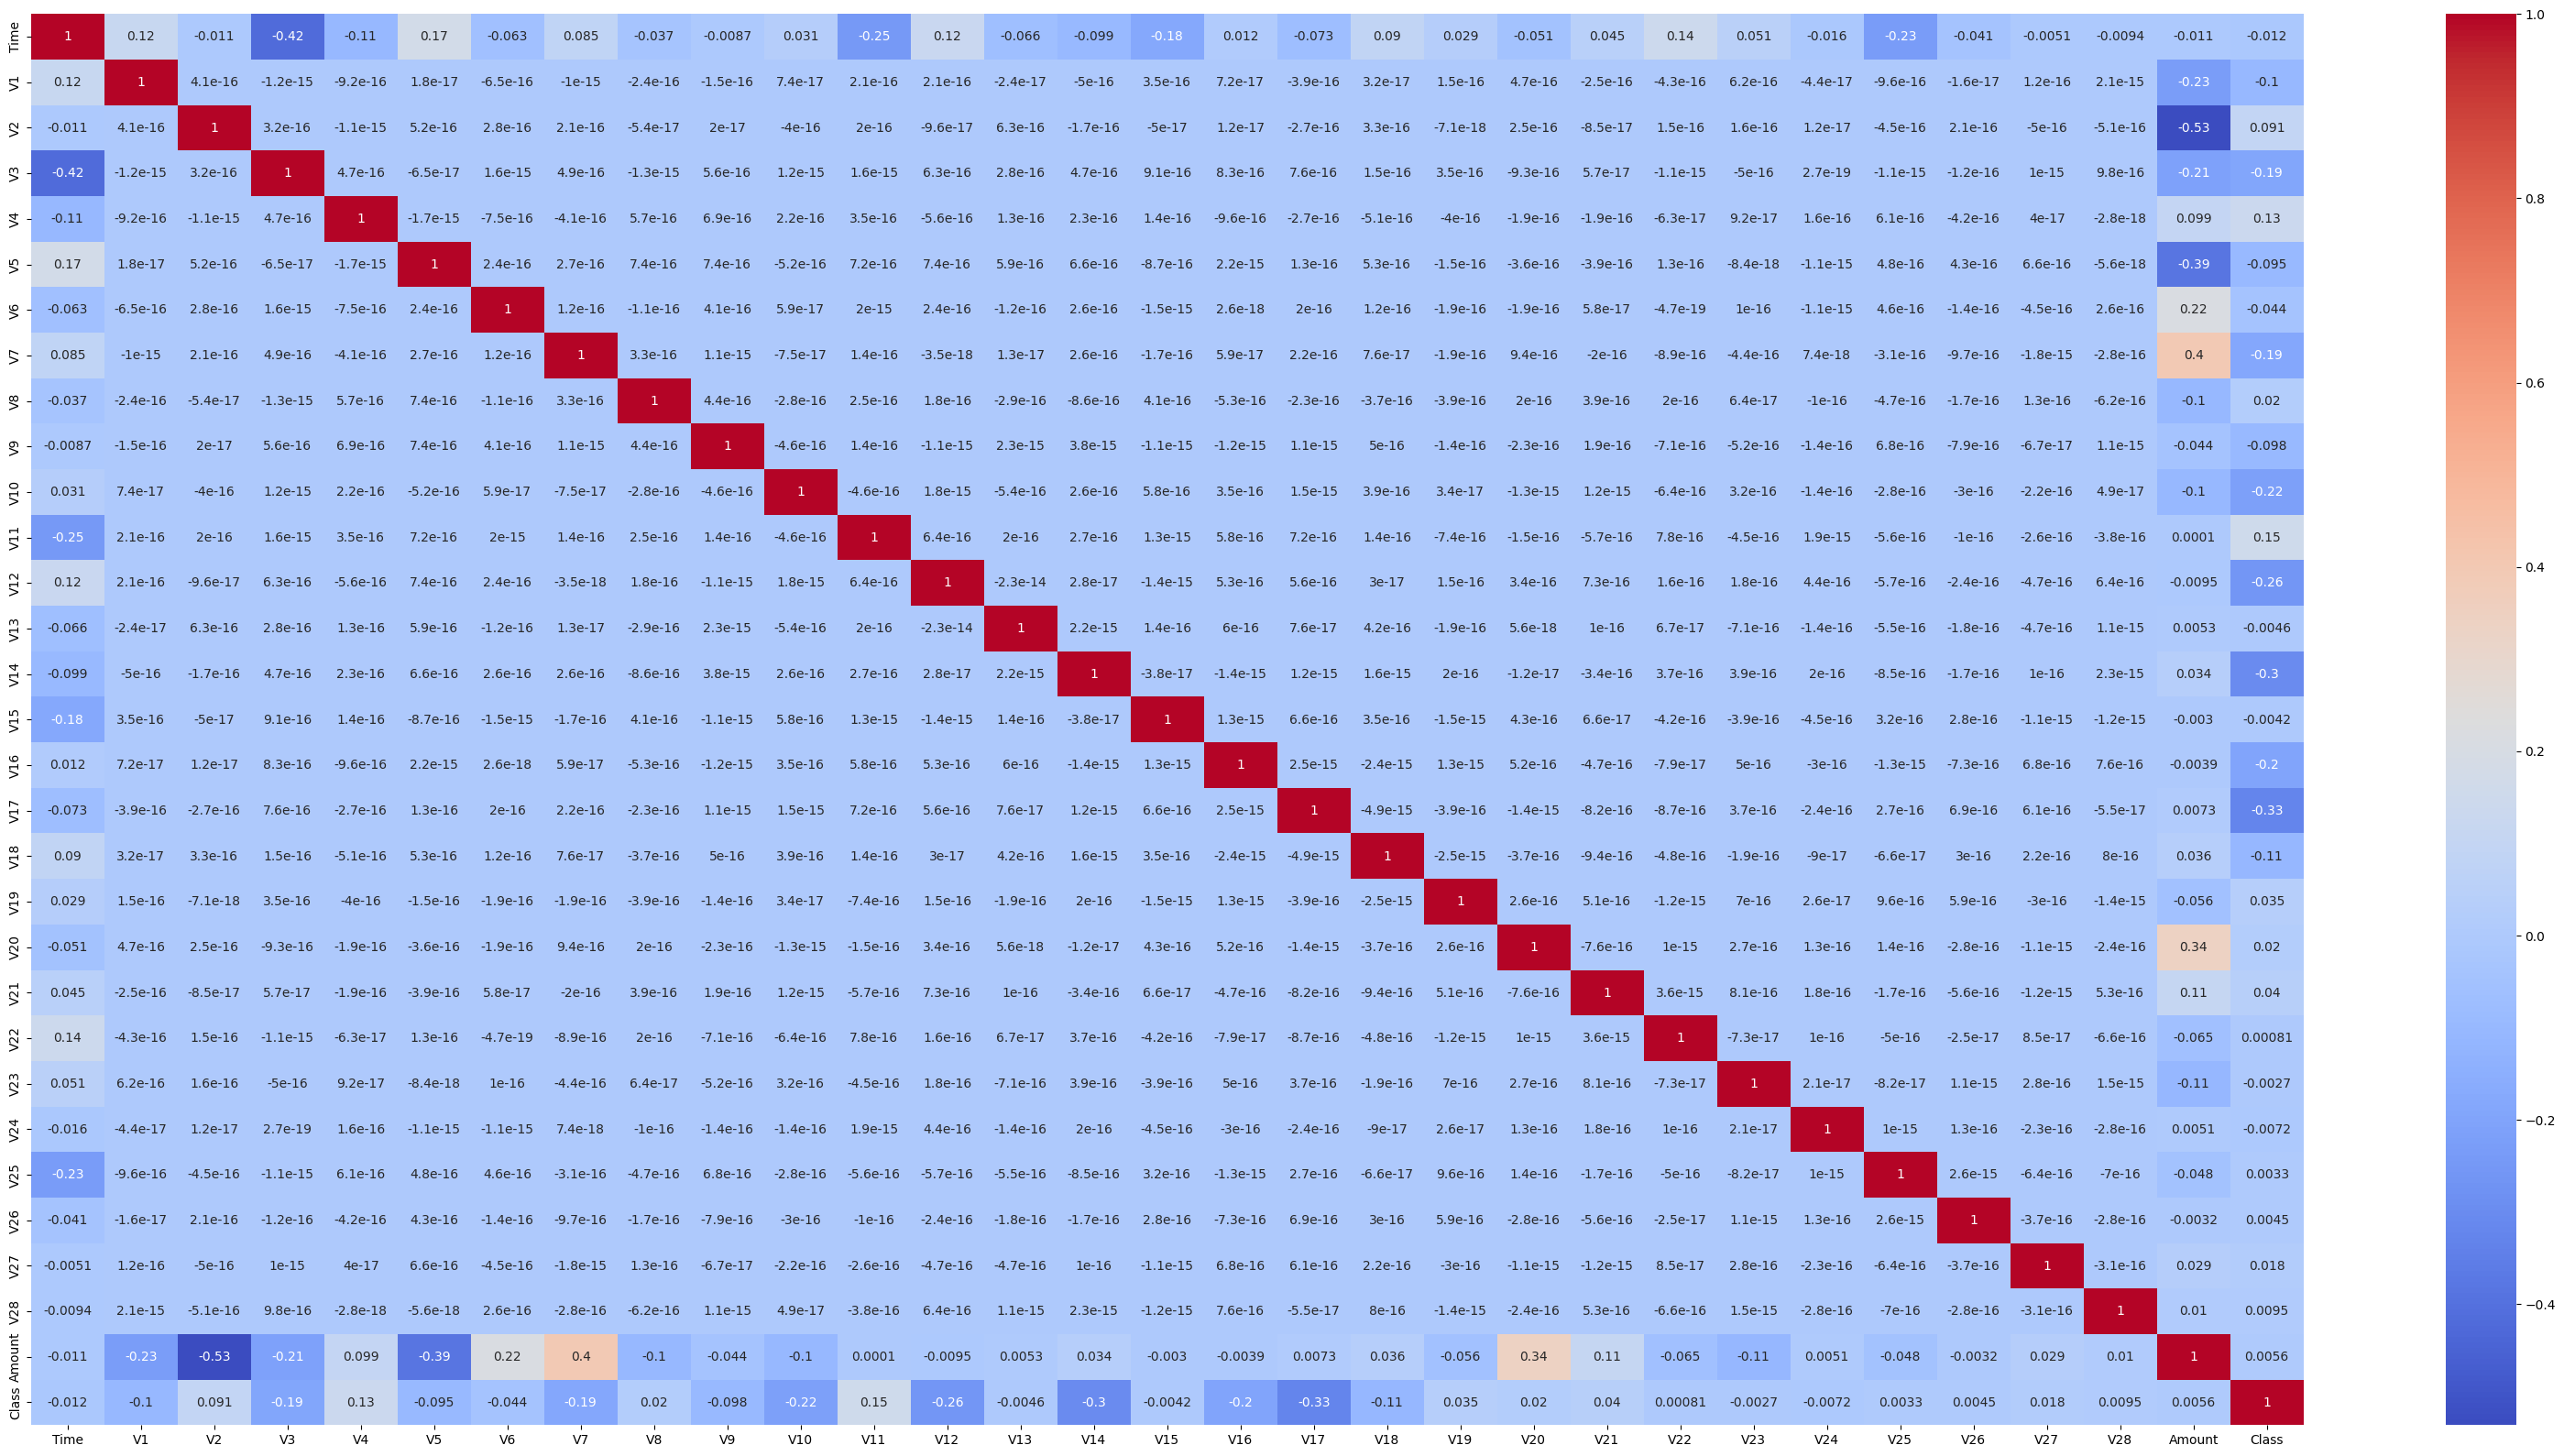

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
df.value_counts(df['Class'])

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
pd.crosstab(df['Class'], normalize=True, columns='count')

col_0,count
Class,
0,0.998273
1,0.001727


<Axes: xlabel='Class', ylabel='count'>

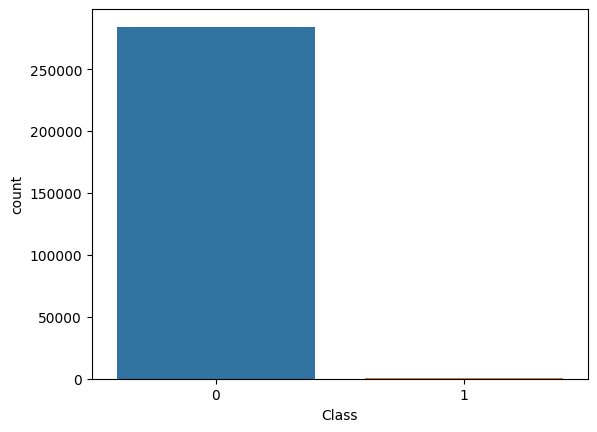

In [10]:
sns.countplot(x='Class', data=df)

1. 99.8% of the samples belongs to non-fraud category and few that is 0.17% belogns to fraud category.
2. Using this type of dataset directly may lead misclassification of model.
3. Therefore we will use Algorithms that balances the imbalanced data like SMOTE or NearMiss algorithms.

<Axes: xlabel='Time'>

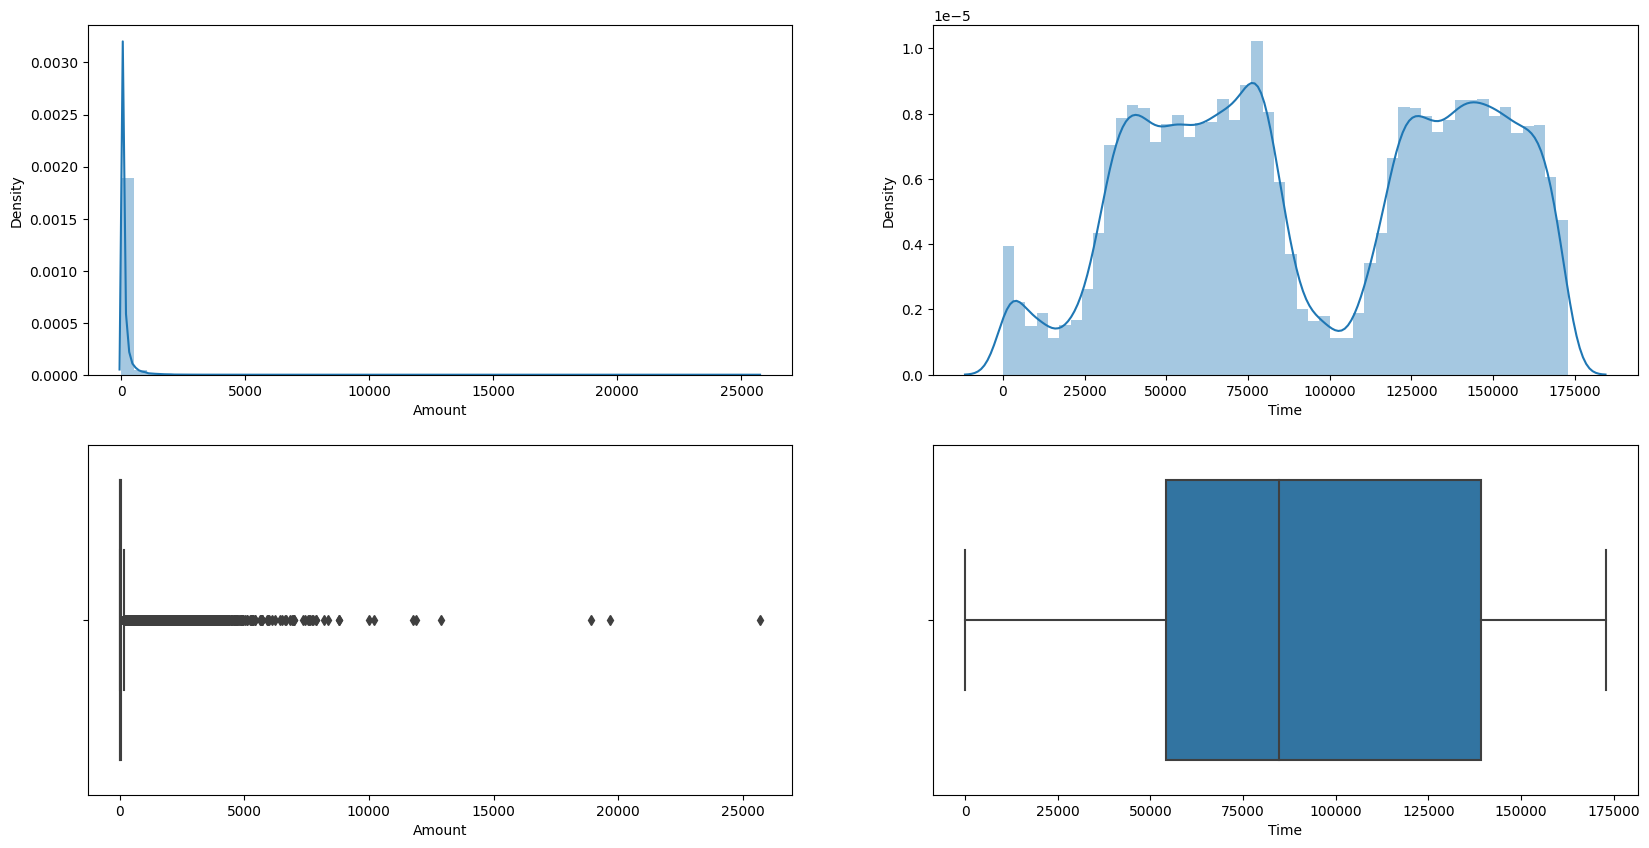

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

sns.distplot(df['Amount'], ax=ax[0][0])
sns.distplot(df['Time'], ax=ax[0][1])
sns.boxplot(x='Amount', data=df, ax=ax[1][0])
sns.boxplot(x='Time', data=df, ax=ax[1][1])

1. Most people have drawn amount less than 5000 dollors.
2. Most transactions durations are from 50,000 to 1,50,000 seconds.

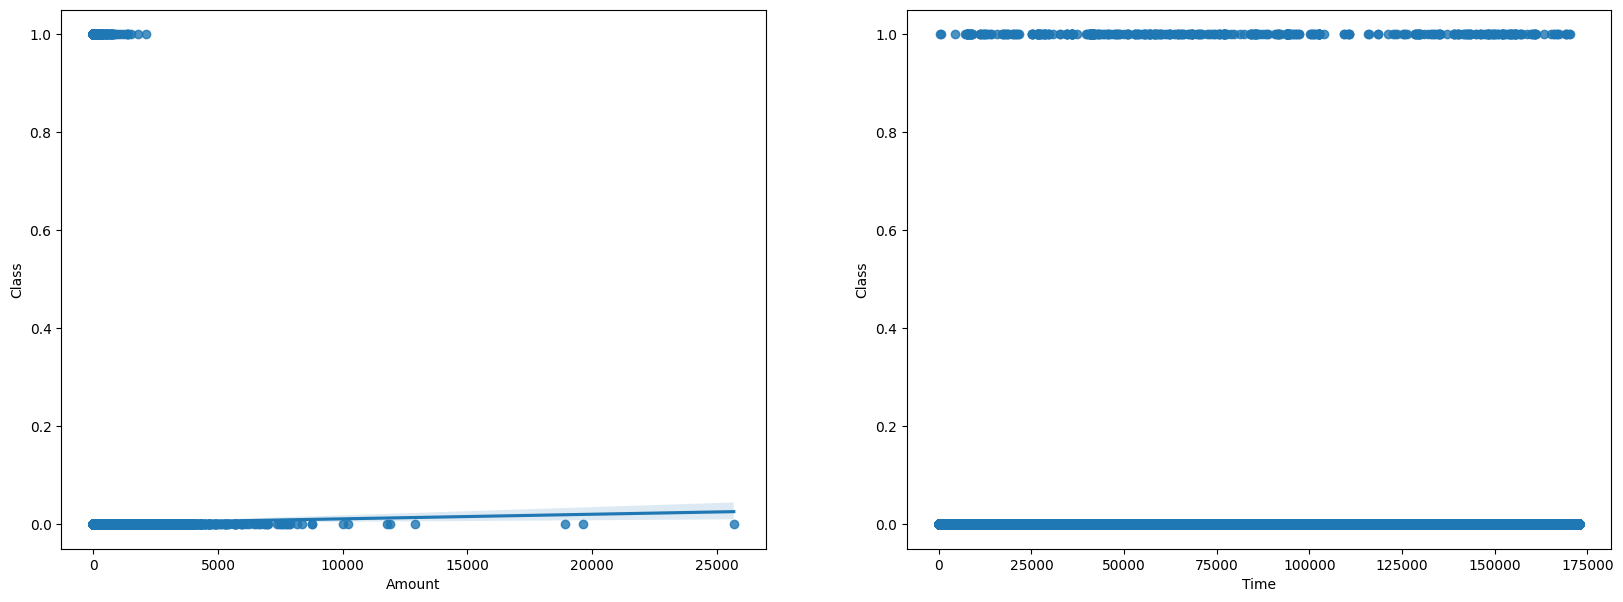

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))

y = 'Class'
x = ['Amount', 'Time']

for i, feature in enumerate(x):
    sns.regplot(x = feature, y=y, data = df, ax = ax[i])

1. Our assumption is correct if build the model with the imbalanced dataset we have it leads to a very high misclassisfication.
2. It forgets about all fraudulent transactions and considers only fraud transactions.
3. so we must balance the fraud and non fraud transactions data.
4. There are 492 fraud transactions, so better get our non-fraud transactions to this number.
5. Before that let's scale the amount and time columns since all columns in dataset are already scaled.

In [13]:
# Scaling the data

from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['newAmount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['newTime'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

Amount = df['newAmount']
Time = df['newTime']

df.drop(['newAmount', 'newTime'], inplace=True, axis=1)

df.insert(0, 'Amount', Amount)
df.insert(1, 'Time', Time)

df.head()


,Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


1. Robust Scaler is used since the Amount and Time are normally distributed. If they are normally distributed then we can use Standard Scaler.

# Model Building

## Logistic Regression Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

X = df.drop(columns = ['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

lrm = LogisticRegression()

lrm.fit(X_train, y_train)

y_prediction = lrm.predict(X_test)

In [15]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85305
           1       0.87      0.64      0.74       138

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



1. Though the overall model accuracy is very good and is nearly 100% accuarte this model cannot be accepted since recall of fraud transactions is less compared to non fraud transactions.
2. The model is more biased towards non fraud transactions

## SMOTE Logistic Regression Model

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'auto', random_state=5)

X_train_osampled, y_train_osampled = smote.fit_resample(X_train, y_train)

print(f"Before Sampling: {X_train.shape}")
print(f"Before Sampling: {y_train.shape}")

print(f"After Sampling: {X_train_osampled.shape}")
print(f"After Sampling: {y_train_osampled.shape}")

Before Sampling: (199364, 30)
Before Sampling: (199364,)
After Sampling: (398020, 30)
After Sampling: (398020,)


In [17]:
lrms = LogisticRegression()

lrms.fit(X_train_osampled, y_train_osampled)

y_prediction = lrms.predict(X_test)

In [18]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85305
           1       0.05      0.93      0.10       138

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



1. This model has an accuracy of 97% and can be accepted since recall of both classes is nearly same.

## Near Miss Algorithm Logistic Regression Model

In [19]:
from imblearn.under_sampling import NearMiss

nearmiss = NearMiss()

X_train_usampled, y_train_usampled = nearmiss.fit_resample(X_train, y_train)

print(f"Before Sampling: {X_train.shape}")
print(f"Before Sampling: {y_train.shape}")

print(f"After Sampling: {X_train_usampled.shape}")
print(f"After Sampling: {y_train_usampled.shape}")

Before Sampling: (199364, 30)
Before Sampling: (199364,)
After Sampling: (708, 30)
After Sampling: (708,)


In [20]:
lrmn = LogisticRegression()

lrmn.fit(X_train_usampled, y_train_usampled)

y_prediction = lrmn.predict(X_test)

In [21]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79     85305
           1       0.00      0.91      0.01       138

    accuracy                           0.65     85443
   macro avg       0.50      0.78      0.40     85443
weighted avg       1.00      0.65      0.79     85443



1. The accuracy score of this model is very low and recall of both classes is also not matching so better not chose undersmapling technique we will go with SMOTE sampling technique which gave us high accuracy.

## Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_prediction = dtc.predict(X_test)

In [23]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85305
           1       0.79      0.80      0.79       138

    accuracy                           1.00     85443
   macro avg       0.90      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [24]:
dtcs = DecisionTreeClassifier()

dtcs.fit(X_train_osampled, y_train_osampled)

y_prediction = dtcs.predict(X_test)

In [25]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85305
           1       0.38      0.77      0.51       138

    accuracy                           1.00     85443
   macro avg       0.69      0.88      0.75     85443
weighted avg       1.00      1.00      1.00     85443



In [26]:
dtcn = DecisionTreeClassifier()

dtcn.fit(X_train_osampled, y_train_osampled)

y_prediction = dtcn.predict(X_test)

In [27]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85305
           1       0.36      0.77      0.49       138

    accuracy                           1.00     85443
   macro avg       0.68      0.88      0.75     85443
weighted avg       1.00      1.00      1.00     85443



## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_prediction = rfc.predict(X_test)

In [29]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85305
           1       0.97      0.83      0.89       138

    accuracy                           1.00     85443
   macro avg       0.98      0.91      0.95     85443
weighted avg       1.00      1.00      1.00     85443



In [30]:
rfcs = RandomForestClassifier()

rfcs.fit(X_train_osampled, y_train_osampled)

y_prediction = rfcs.predict(X_test)

In [31]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85305
           1       0.92      0.83      0.87       138

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [32]:
rfcn = RandomForestClassifier()

rfcn.fit(X_train_usampled, y_train_usampled)

y_prediction = rfcn.predict(X_test)

In [33]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20     85305
           1       0.00      0.99      0.00       138

    accuracy                           0.11     85443
   macro avg       0.50      0.55      0.10     85443
weighted avg       1.00      0.11      0.20     85443



## K-Nearest Neighbours Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


knc = KNeighborsClassifier()

knc.fit(X_train, y_train)

y_prediction = knc.predict(X_test)

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85305
           1       0.96      0.79      0.87       138

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [39]:
knc = KNeighborsClassifier()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_osampled)
X_test = scaler.transform(X_test)


knc.fit(X_train_osampled, y_train_osampled)

y_prediction = knc.predict(X_test)

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85305
           1       0.00      0.00      0.00       138

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



In [38]:
knc = KNeighborsClassifier()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_usampled)
X_test = scaler.transform(X_test)

knc.fit(X_train_usampled, y_train_usampled)

y_prediction = knc.predict(X_test)

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     85305
           1       0.00      0.40      0.01       138

    accuracy                           0.80     85443
   macro avg       0.50      0.60      0.45     85443
weighted avg       1.00      0.80      0.89     85443



1. Though many classifiers are giving accuracy score 1 we will go with SMOTE logistic regression clasifier since recall of both classes in that cases is very good.